In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# this is used to get the plots inline i.e. in the same page

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LGD_DATA.csv")

------

# EDA

In [3]:
print(df.info())
print('\n',df.isnull().sum())
print('\n',df.describe())
print('\n',df.columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB
None

 Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

                Ac_No           Age  Years of Experience  Number of Vehicles  \
count   15290.000000  15290.000000         15290.000000        15290.000000   
mean   149961.789339     42.328254            23.732897            2.495880   
std     28947.841061     18.280511            17.850707            0.953776   
min

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


No missing values in tha data

In [4]:
df.corr()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


Multi-colinearity: Age & Year of Experience are highly correlated. So have to omit one of them while training the model.

In [5]:
df.columns=['Acc_no','Age','Years_of_experience','Number_of_vehicles','Gender','Married','Loss_in_thousands']
df.columns

Index(['Acc_no', 'Age', 'Years_of_experience', 'Number_of_vehicles', 'Gender',
       'Married', 'Loss_in_thousands'],
      dtype='object')

----

# Visualization

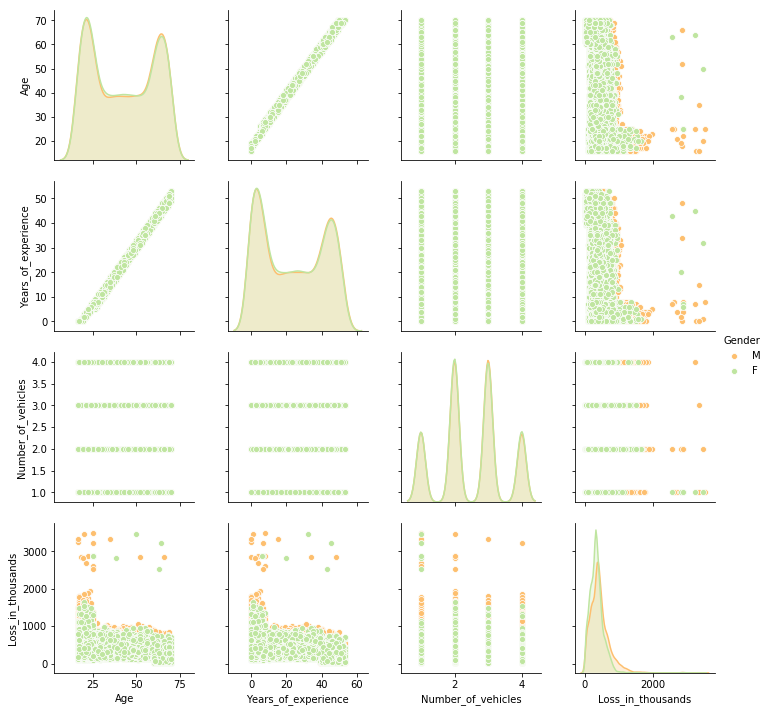

In [6]:
sns.pairplot(df,hue='Gender',palette='Spectral',
             vars=['Age','Years_of_experience','Number_of_vehicles','Loss_in_thousands'])

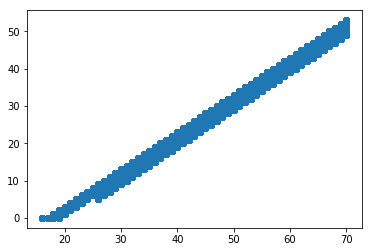

In [7]:
plt.scatter(df['Age'],df['Years_of_experience']) #multi-colinearity

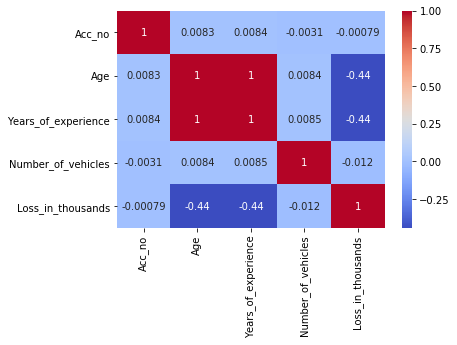

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') #Age is an important variable

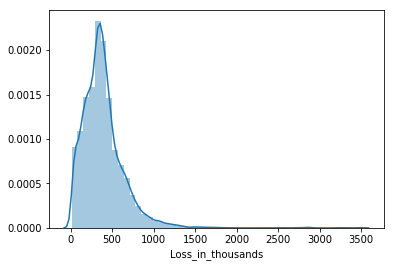

In [9]:
sns.distplot(df['Loss_in_thousands'])

In [10]:
sns.distplot(list(map(math.log,df['Loss_in_thousands'])),bins=50)
#to normalize variable from right skewed

NameError: name 'math' is not defined

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Age'][df.Age<30],y='Loss_in_thousands',data=df,hue='Gender')

In [ ]:
sns.countplot(x=df['Age'][df.Age<30],hue='Gender',data=df)

As proportion of males and females are almost same, males are performing poorly

---

In [ ]:
sns.countplot(x=df['Age'][df.Age<30],hue='Married',data=df)

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Age'][df.Age<30],y='Loss_in_thousands',data=df,hue='Married')

Even the proportion of Married are more than Singles, still Singles causing more losses

----------

In [ ]:
sns.violinplot(x='Married',y='Loss_in_thousands',data=df,hue='Gender')

Single Males are worst